In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import time

In [ ]:
# Task №1

In [2]:
def generate_adj_matrix(E = 500, V = 100):

  adj_mat = np.zeros([V,V])

  el_id = np.arange(V * V)
  sequence = []

  for i in range(V):
    for j in range(1 + i, V):
      sequence.append(el_id[i * V + j])

  connections = random.sample(sequence, k = E)

  for i in connections:
    weight = random.randint(0,10)
    adj_mat[i // V][i % V] = weight
    adj_mat[i % V][i // V] = weight

  return adj_mat

In [3]:
def visualize_graph(adj_mat):

  G = nx.from_numpy_matrix(np.matrix(adj_mat), create_using=nx.MultiGraph)
  nx.draw(G, with_labels=True, alpha=0.6, node_shape='o')
  plt.show()

In [12]:
adj_mat = generate_adj_matrix()
adj_mat

array([[0., 0., 9., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 8., 0., 0.],
       ...,
       [0., 0., 8., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

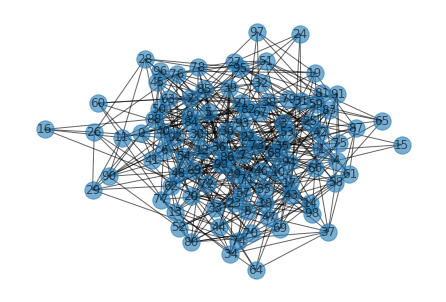

In [14]:
visualize_graph(adj_mat)

In [15]:
def dijkstra(adj_mat, start_node):

  G = nx.from_numpy_matrix(np.matrix(adj_mat), create_using=nx.MultiGraph)
  distances = []
  
  for end_node in range(len(adj_mat)):

    path = nx.dijkstra_path(G, start_node, end_node)

    length = 0

    for i in range(1,len(path)):

      length += adj_mat[path[i]][path[i-1]]

    distances.append(length)

  return distances

In [16]:
def bellman_ford(adj_mat, start_node):

  G = nx.from_numpy_matrix(np.matrix(adj_mat), create_using=nx.MultiGraph)
  distances = []
  
  for end_node in range(len(adj_mat)):

    path = nx.bellman_ford_path(G, start_node, end_node)

    length = 0

    for i in range(1,len(path)):

      length += adj_mat[path[i]][path[i-1]]

    distances.append(length)

  return distances

In [17]:
def timing(adj_mat, n):

  start_node = random.randint(0, len(adj_mat) - 1)
  time_dijkstra = []
  time_bellman_ford = []

  for i in range(n):

    start_time = time.time()
    res = dijkstra(adj_mat, start_node)
    time_dijkstra.append(time.time() - start_time)

    res = bellman_ford(adj_mat, start_node)
    time_bellman_ford.append(time.time() - start_time - time_dijkstra[-1])

  return "Deijkstra(time) = " + str(np.mean(time_dijkstra)) + " sec.", "Bellman Ford(time) = " + str(np.mean(time_bellman_ford)) + " sec."

In [18]:
timing(adj_mat, 10)

('Deijkstra(time) = 0.07799689769744873 sec.',
 'Bellman Ford(time) = 0.5008384466171265 sec.')

In [ ]:
# Task №2

In [19]:
def generate_cellgrid(rows = 10, cols = 20, obst = 40):
  cellgrid = nx.grid_2d_graph(rows, cols)
  pos = dict((n,n) for n in cellgrid.nodes())
  #labels = dict(((i, j), i + (cols-1-j) * rows) for i, j in cellgrid.nodes())

  positions = []

  cellgrid.add_edges_from([
    ((x, y), (x+1, y+1))
    for x in range(0,rows-1)
    for y in range(0,cols-1)
    ] + [
    ((x+1, y), (x, y+1))
    for x in range(0,rows-1)
    for y in range(0,cols-1)
    ], weight=1.4)
  
  for i in range(rows):
    for j in range(cols):

      positions.append((i,j))

  walls = random.sample(positions, obst)

  cellgrid.remove_nodes_from(walls)

  return {'cellgrid':cellgrid, 'pos' : pos}

In [20]:
def visualize_cellgrid(cellgrid):

  plt.figure(figsize=(5,10))
  nx.draw_networkx(cellgrid['cellgrid'], pos=cellgrid['pos'],
                 #labels=cellgrid[2],
                 with_labels=False, node_size=200, node_color='r')

In [21]:
def astar(cellgrid, start_node, end_node):

  G = nx.from_numpy_matrix(np.matrix(nx.to_numpy_matrix(cellgrid)), create_using=nx.MultiGraph)

  length = nx.astar_path_length(G, start_node, end_node)

  return length

In [22]:
def astar_timing(cellgrid):

  timing = []
  path = []
  nodes_list = [i for i in range(160)]

  for i in range(5):

    path_nodes = random.sample(nodes_list, 2)
    path.append(path_nodes)

    start_time = time.time()
    astar(cellgrid, path_nodes[0], path_nodes[1])

    timing.append(time.time() - start_time)

  return timing, path

In [23]:
res = generate_cellgrid()

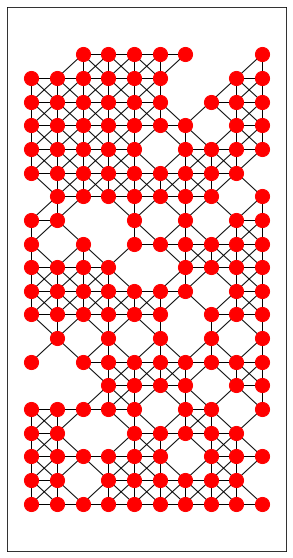

In [24]:
visualize_cellgrid(res)

In [27]:
astar_timing(res['cellgrid']) # time for each path

([0.011965751647949219,
  0.0060596466064453125,
  0.00593256950378418,
  0.008636236190795898,
  0.008710384368896484],
 [[130, 99], [19, 52], [92, 137], [141, 8], [148, 124]])